In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyextremes import EVA
from scipy.stats import genpareto
from scipy.stats import genextreme

datos = pd.read_excel('datos_viento.xlsx', sheet_name='waves P2 P6')
datos_p6 = datos[['Fecha y Hora', 'P6_Hs']].dropna()
datos_p6['Fecha y Hora'] = pd.to_datetime(datos_p6['Fecha y Hora'])
datos_p6.set_index('Fecha y Hora', inplace=True)

## Analisis con Block Maxima

Block Maxima (BM) Summary:
               return value  lower ci  upper ci
return period                                  
50.0               7.019009  6.173264  7.634651
100.0              7.489445  6.539621  8.189482
AIC for Block Maxima: 89.29184569403819
BIC for Block Maxima: 93.95788987850642


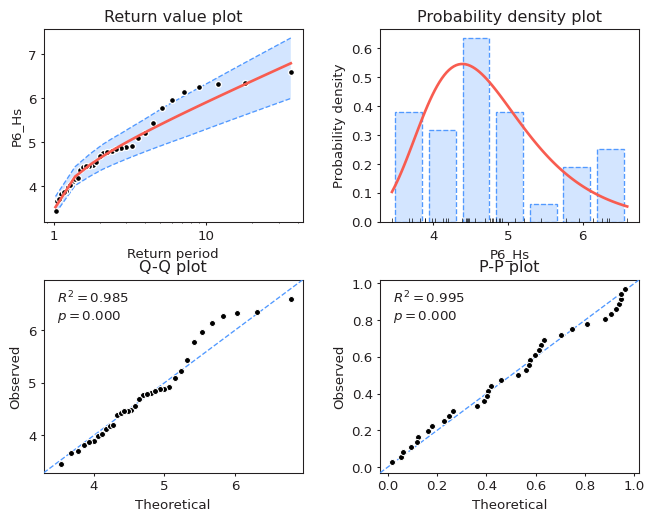

In [5]:
model_bm = EVA(data=datos_p6['P6_Hs'])
model_bm.get_extremes(method='BM', block_size='365D',min_last_block=0.2)
model_bm.fit_model()

ret_periods = [50, 100]
summary_bm = model_bm.get_summary(return_period=ret_periods, alpha=0.95)

print("Block Maxima (BM) Summary:")
print(summary_bm)
extremos_bm = model_bm.extremes
params_bm = genextreme.fit(extremos_bm)
shape, loc, scale = params_bm

log_likelihood_bm = genextreme.logpdf(extremos_bm, shape, loc=loc, scale=scale).sum()
k_bm = 3
n_bm = len(extremos_bm)

# Calcular AIC y BIC
aic_bm = 2 * k_bm - 2 * log_likelihood_bm
bic_bm = np.log(n_bm) * k_bm - 2 * log_likelihood_bm

print(f"AIC for Block Maxima: {aic_bm}")
print(f"BIC for Block Maxima: {bic_bm}")

model_bm.plot_diagnostic(alpha=0.95, figsize=(8, 6))
plt.show()

## Para POT

In [11]:
thresholds = [4, 4.5, 5]
ret_periods = [50, 100]

for threshold in thresholds:
    model_pot = EVA(data=datos_p6['P6_Hs'])
    model_pot.get_extremes(method='POT', threshold=threshold)
    
    for ret_period in ret_periods:
        model_pot.fit_model()
        
        summary_pot = model_pot.get_summary(return_period=ret_periods, alpha=0.95)
        extremos_pot = model_pot.extremes
        params_pot = genextreme.fit(extremos_pot)
        shape, loc, scale = params_pot

        # Calcular la log-verosimilitud
        log_likelihood_pot = genextreme.logpdf(extremos_pot, shape, loc=loc, scale=scale).sum()
        k_pot = 3  # número de parámetros en la distribución GEV
        n_pot = len(extremos_pot)

        # Calcular AIC y BIC
        aic_pot = 2 * k_pot - 2 * log_likelihood_pot
        bic_pot = np.log(n_pot) * k_pot - 2 * log_likelihood_pot

        print(f'Para umbral de {threshold} y período de retorno {ret_period}')
        print(summary_pot)
        print(f"AIC para POT: {aic_pot}")
        print(f"BIC para POT: {bic_pot}")


Para umbral de 4 y período de retorno 50
               return value  lower ci  upper ci
return period                                  
50.0               7.110142  6.550843  7.948183
100.0              7.584326  6.939755  8.550138
AIC para POT: 99.64323806469406
BIC para POT: 106.21220229077333
Para umbral de 4 y período de retorno 100
               return value  lower ci  upper ci
return period                                  
50.0               7.110142  6.617048  8.168750
100.0              7.584326  7.016053  8.804333
AIC para POT: 99.64323806469406
BIC para POT: 106.21220229077333
Para umbral de 4.5 y período de retorno 50
               return value  lower ci  upper ci
return period                                  
50.0               7.070585  6.457773  7.862294
100.0              7.540636  6.815766  8.477115
AIC para POT: 46.11960623854197
BIC para POT: 50.42156785199741
Para umbral de 4.5 y período de retorno 100
               return value  lower ci  upper ci
return perio

(<Figure size 768x576 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='P6_Hs'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='P6_Hs', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))